# Exposys Data Lab
## Data Science
### PROJECT DESCRIPTION
In the given dataset, R&D Spend, Administration Cost and Marketing Spend of 50 Companies 
are given along with the profit earned. The target is to prepare an ML model which can predict 
the profit value of a company if the value of its R&D Spend, Administration Cost and Marketing 
Spend are given. <br>
 i) Construct Different Regression algorithms <br>
 ii) Divide the data into train set and test set <br>
 iii) Calculate different regression metrics <br>
 iv) Choose the best model <br>
Language: Python 

<b>Dataset</b><br>
Dataset contain 4 columns--<b>"R&D Spend","Administration","Marketing Spend","Profit"</b>.

<b>1. R&D spending:</b> The amount which startups are spending on Research and development.

<b>2. Administration: </b>The amount which startups are spending on the Admin panel.

<b>3. Marketing spend:</b> The amount which startups are spending on marketing strategies.

<b>4. Profit:</b> How much profit that particular startup is making.

In [28]:
# Import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


- Numpy version - 1.21.2<br>
- Pandas version - 1.3.5<br>
- Matplotlib version - 3.4.3<br>
- Seaborn version - 0.11.2

In [29]:
# import dataset
df = pd.read_csv("50_startups.csv")

In [30]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [31]:
df.shape

(50, 4)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [33]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [34]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [58]:
print('There are',df.duplicated().sum(),'duplicate values in the dateset.')

There are 0 duplicate values in the dateset.


In [35]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
Profit             float64
dtype: object

In [36]:
c=df.corr()
c

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


### Data Visualization

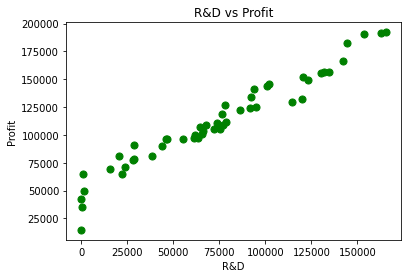

In [37]:
#Plot R&D vs Profit............
x1 = df.iloc[:, 0].values
y1 = df.iloc[:, -1].values
plt.scatter(x1,y1,color='Green',s=50)
plt.xlabel('R&D')
plt.ylabel('Profit')
plt.title('R&D vs Profit')
plt.show()

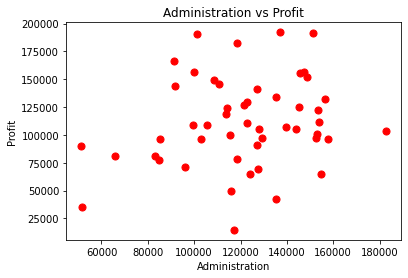

In [38]:
#Plot Administration vs Profit
x1 = df.iloc[:, 1].values
y1 = df.iloc[:, -1].values
plt.scatter(x1,y1,color='Red',s=50)
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.title('Administration vs Profit')
plt.show()

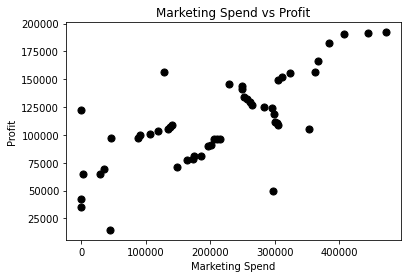

In [39]:
#Plot Marketing Spend vs Profit
x1 = df.iloc[:, 2].values
y1 = df.iloc[:, -1].values
plt.scatter(x1,y1,color='Black',s=50)
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.title('Marketing Spend vs Profit')
plt.show()

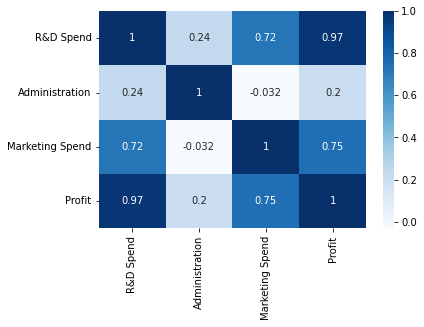

In [40]:
sns.heatmap(c,annot=True,cmap='Blues')
plt.show()

In [41]:
X = df.iloc[:,:-1]   # Independent features
y = df.iloc[:,-1]    # Dependent feature

In [42]:
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [43]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

## 1.Multiple Linear Regression

In [60]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [47]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [48]:
y_pred = model.predict(X_test)
y_pred

array([103901.8969696 , 132763.05993126, 133567.90370044,  72911.78976736,
       179627.92567224, 115166.64864795,  67113.5769057 ,  98154.80686776,
       114756.11555221, 169064.01408795])

In [49]:
y_test

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: Profit, dtype: float64

Compare the predicted values with the real values using the R-squared value¶
- Formula for r-squared => 1 - (sum of residual / sum of mean)
- Sum of residual = mean(sum(y_test - y_pred)^2))
- Sum of mean = mean(sum(y_test - y_mean)^2))

- (Sum of mean > Sum of residual) always if the model is very good

- r2 value => range between 0.8 to 0.98

- r2 value => the more nearer to 1 => the better the model

In [50]:
r2Score=r2_score(y_test, y_pred)
print("R2 score of model is: ",r2Score)

R2 score of model is:  0.9393955917820571


In [54]:
training_data_model_score = model.score(X_train, y_train)
print("Model Score on Training data:",training_data_model_score)

testing_data_model_score = model.score(X_test, y_test)
print("Model Score on Testing data:",testing_data_model_score)


Model Score on Training data: 0.9499572530324031
Model Score on Testing data: 0.9393955917820571


In [55]:
df = pd.DataFrame(data={'Predicted value':y_pred,'Actual Value':y_test})
df

,Predicted value,Actual Value
28,103901.896970,103282.38
11,132763.059931,144259.40
10,133567.903700,146121.95
41,72911.789767,77798.83
2,179627.925672,191050.39
27,115166.648648,105008.31
38,67113.576906,81229.06
31,98154.806868,97483.56
22,114756.115552,110352.25
4,169064.014088,166187.94


#### MAE

In [65]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 7320.441614848127


#### MSE

In [66]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))

Mean Squared Error: 77506468.16885409


### Result
R2 score -> 93% which is very near to 1 thus showing that the model used is very good